
## LOAD SHEDDING PREDICTION SYSTEM - DATA CLEANING & PREPARATION


* Project: Addressing the Limitations of Reactive Load Shedding Schedules
* Author: Bonyu Miracle Glen
* Institution: African Leadership University


This notebook performs complete data preparation for the load shedding prediction system, including data loading, cleaning, transformation, visualization, and export.



## 1️⃣ Environment Setup

First, let's set up our environment and mount Google Drive for persistent storage.

In [ ]:

print("="*70)
print("LOAD SHEDDING PREDICTION - DATA CLEANING PIPELINE")
print("="*70)
print("\n[1/10] Setting up environment...\n")

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 8)

print(" Libraries imported successfully!")
print(f"   pandas version: {pd.__version__}")
print(f"   numpy version: {np.__version__}")

# Create project directory structure
project_dir = '/content/drive/MyDrive/LoadShedding_Capstone'
raw_data_dir = f'{project_dir}/raw_data'
output_data_dir = f'{project_dir}/data'
output_viz_dir = f'{project_dir}/outputs'
models_dir = f'{project_dir}/models'

# Create directories
for directory in [raw_data_dir, output_data_dir, output_viz_dir, models_dir]:
    os.makedirs(directory, exist_ok=True)

print("\n Google Drive mounted successfully!")
print(f" Project directory: {project_dir}")




LOAD SHEDDING PREDICTION - DATA CLEANING PIPELINE

[1/10] Setting up environment...

Mounted at /content/drive
 Libraries imported successfully!
   pandas version: 2.2.2
   numpy version: 2.0.2

 Google Drive mounted successfully!
 Project directory: /content/drive/MyDrive/LoadShedding_Capstone



## SECTION 2: DATA LOADING FROM GOOGLE DRIVE



In [ ]:

print("\n" + "="*70)
print("[2/10] Loading raw datasets from Google Drive...")
print("="*70)

# File paths - UPDATE THESE TO MATCH YOUR FILE NAMES
grid_file = f'{raw_data_dir}/eskom_grid_perfomance.csv'  # Your file name
loadshed_file = f'{raw_data_dir}/EskomSePush_history.csv'  # Your file name

print(f"\n📂 Looking for files...")
print(f"   Grid data: {grid_file}")
print(f"   Load shedding: {loadshed_file}\n")

# Check if files exist
if not os.path.exists(grid_file):
    print("❌ ERROR: Grid data file not found!")
    print(f"\n   Please upload your grid CSV to: {raw_data_dir}/")
    raise FileNotFoundError(f"Grid data file not found: {grid_file}")

if not os.path.exists(loadshed_file):
    print("❌ ERROR: Load shedding file not found!")
    print(f"\n   Please upload your load shedding CSV to: {raw_data_dir}/")
    raise FileNotFoundError(f"Load shedding file not found: {loadshed_file}")

# Load datasets
print("📊 Loading datasets from CSV files...\n")

grid_df = pd.read_csv(grid_file)
print(f"✅ Grid data loaded: {len(grid_df):,} rows × {len(grid_df.columns)} columns")

loadshed_df = pd.read_csv(loadshed_file)
print(f"✅ Load shedding history loaded: {len(loadshed_df):,} rows × {len(loadshed_df.columns)} columns")

# Display sample
print("\n📋 Grid Data Sample (first 3 rows):")
print(grid_df.head(3))

print("\n📋 Load Shedding History Sample (first 3 rows):")
print(loadshed_df.head(3))


[2/10] Loading raw datasets from Google Drive...

📂 Looking for files...
   Grid data: /content/drive/MyDrive/LoadShedding_Capstone/raw_data/eskom_grid_perfomance.csv
   Load shedding: /content/drive/MyDrive/LoadShedding_Capstone/raw_data/EskomSePush_history.csv

📊 Loading datasets from CSV files...

✅ Grid data loaded: 43,824 rows × 43 columns
✅ Load shedding history loaded: 1,563 rows × 2 columns

📋 Grid Data Sample (first 3 rows):
  Date Time Hour Beginning  Original Res Forecast before Lockdown  \
0      2021-04-01 00:00:00                              22110.497   
1      2021-04-01 01:00:00                              21807.986   
2      2021-04-01 02:00:00                              21769.568   

   Residual Forecast  RSA Contracted Forecast  Dispatchable Generation  \
0          21076.232                21833.271                21177.801   
1          20803.317                21453.623                20886.668   
2          20752.810                21284.327                2

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 8)

print("✅ Libraries imported successfully!")
print(f"   pandas version: {pd.__version__}")
print(f"   numpy version: {np.__version__}")

✅ Libraries imported successfully!
   pandas version: 2.2.2
   numpy version: 2.0.2


# SECTION 3: TIMESTAMP CONVERSION & DATE RANGE CHECK


In [ ]:

print("\n" + "="*70)
print("[3/10] Converting timestamps and checking date ranges...")
print("="*70)

# Convert timestamps to datetime objects
grid_df['datetime'] = pd.to_datetime(grid_df['Date Time Hour Beginning'])
loadshed_df['datetime'] = pd.to_datetime(loadshed_df['created_at'])

print("\n📅 Date Ranges:\n")
print(f"Grid Data:")
print(f"   Start: {grid_df['datetime'].min()}")
print(f"   End:   {grid_df['datetime'].max()}")
print(f"   Duration: {(grid_df['datetime'].max() - grid_df['datetime'].min()).days} days\n")

print(f"Load Shedding History:")
print(f"   Start: {loadshed_df['datetime'].min()}")
print(f"   End:   {loadshed_df['datetime'].max()}")
print(f"   Duration: {(loadshed_df['datetime'].max() - loadshed_df['datetime'].min()).days} days")


[3/10] Converting timestamps and checking date ranges...

📅 Date Ranges:

Grid Data:
   Start: 2021-04-01 00:00:00
   End:   2026-03-31 23:00:00
   Duration: 1825 days

Load Shedding History:
   Start: 2014-03-06 09:00:00
   End:   2025-05-15 22:00:00
   Duration: 4088 days


# SECTION 4: REMOVE DUPLICATES


In [ ]:

print("\n" + "="*70)
print("[4/10] Removing duplicates...")
print("="*70)

# Check for duplicates in load shedding data
duplicates_before = loadshed_df['datetime'].duplicated().sum()
print(f"\n🔍 Duplicate timestamps found: {duplicates_before}")

if duplicates_before > 0:
    # Show duplicates
    dups = loadshed_df[loadshed_df['datetime'].duplicated(keep=False)].sort_values('datetime')
    print("\n   Duplicate entries:")
    print(dups)

    # Remove duplicates (keep first occurrence)
    loadshed_df = loadshed_df.drop_duplicates(subset='datetime', keep='first')
    print(f"\n✅ Duplicates removed. New count: {len(loadshed_df):,} rows")
else:
    print("✅ No duplicates found")


[4/10] Removing duplicates...

🔍 Duplicate timestamps found: 0
✅ No duplicates found


# SECTION 5: FORWARD-FILL TO HOURLY GRANULARITY


In [ ]:

print("\n" + "="*70)
print("[5/10] Forward-filling load shedding stages to hourly...")
print("="*70)

# Determine overlapping period between both datasets
overlap_start = max(grid_df['datetime'].min(), loadshed_df['datetime'].min())
overlap_end = min(grid_df['datetime'].max(), loadshed_df['datetime'].max())

print(f"\n🔄 Overlapping period:")
print(f"   Start: {overlap_start}")
print(f"   End:   {overlap_end}")
print(f"   Duration: {(overlap_end - overlap_start).days} days")

# Create complete hourly range
hourly_range = pd.date_range(start=overlap_start, end=overlap_end, freq='h')
print(f"\n Creating {len(hourly_range):,} hourly timestamps...")

# Sort load shedding data by datetime
loadshed_df = loadshed_df.sort_values('datetime')

# Forward-fill stages to hourly (event-based → hourly)
loadshed_hourly = loadshed_df.set_index('datetime')['stage'].reindex(hourly_range, method='ffill')

# Fill any remaining NaN with 0 (no load shedding)
loadshed_hourly = loadshed_hourly.fillna(0)

print(f"\n✅ Forward-fill complete: {len(loadshed_hourly):,} hourly records")
print(f"\nStage distribution after forward-fill:")
print(loadshed_hourly.value_counts().sort_index())


[5/10] Forward-filling load shedding stages to hourly...

🔄 Overlapping period:
   Start: 2021-04-01 00:00:00
   End:   2025-05-15 22:00:00
   Duration: 1505 days

 Creating 36,143 hourly timestamps...

✅ Forward-fill complete: 36,143 hourly records

Stage distribution after forward-fill:
stage
0    22839
1      993
2     3873
3     2992
4     3242
5      873
6     1331
Name: count, dtype: int64


# SECTION 6: FEATURE SELECTION


In [ ]:

print("\n" + "="*70)
print("[6/10] Filtering to essential grid features...")
print("="*70)

# Define the 15 essential features
essential_features = [
    'datetime',
    # Core Demand & Supply
    'Residual Demand',
    'RSA Contracted Demand',
    'Dispatchable Generation',
    # Generation Sources
    'Thermal Generation',
    'Nuclear Generation',
    'Eskom OCGT Generation',
    'Total RE',
    # Grid Stress Indicators (MOST IMPORTANT)
    'Total UCLF',
    'Total OCLF',
    'Total UCLF+OCLF',
    'Total PCLF',
    # Emergency Measures
    'ILS Usage',
    'Manual Load_Reduction(MLR)',
    'International Imports'
]

# Filter grid data to only essential features
grid_clean = grid_df[essential_features].copy()

print(f"\n Feature Selection:")
print(f"   Original: {len(grid_df.columns)} columns")
print(f"   Selected: {len(essential_features)} columns")
print(f"   Reduced by: {len(grid_df.columns) - len(essential_features)} columns\n")

print("✅ Selected features:")
for i, feature in enumerate(essential_features[1:], 1):  # Skip datetime
    print(f"   {i:2d}. {feature}")


[6/10] Filtering to essential grid features...

 Feature Selection:
   Original: 44 columns
   Selected: 15 columns
   Reduced by: 29 columns

✅ Selected features:
    1. Residual Demand
    2. RSA Contracted Demand
    3. Dispatchable Generation
    4. Thermal Generation
    5. Nuclear Generation
    6. Eskom OCGT Generation
    7. Total RE
    8. Total UCLF
    9. Total OCLF
   10. Total UCLF+OCLF
   11. Total PCLF
   12. ILS Usage
   13. Manual Load_Reduction(MLR)
   14. International Imports


# SECTION 7: MERGE DATASETS


In [ ]:

print("\n" + "="*70)
print("[7/10] Merging datasets...")
print("="*70)

# Filter grid data to overlapping period
grid_clean = grid_clean[(grid_clean['datetime'] >= overlap_start) &
                        (grid_clean['datetime'] <= overlap_end)]

print(f"\n🔗 Merging...")
print(f"   Grid data in overlap period: {len(grid_clean):,} rows")

# Convert load shedding hourly to DataFrame
loadshed_hourly_df = pd.DataFrame({
    'datetime': loadshed_hourly.index,
    'stage': loadshed_hourly.values
})

# Merge on datetime (inner join - only matching timestamps)
merged_df = pd.merge(
    grid_clean,
    loadshed_hourly_df,
    on='datetime',
    how='inner'
)

print(f"\n✅ Merge complete!")
print(f"   Final dataset: {len(merged_df):,} rows × {len(merged_df.columns)} columns")
print(f"   Memory usage: {merged_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Display sample
print("\n📋 Merged Data Sample (first 5 rows):")
print(merged_df.head())


[7/10] Merging datasets...

🔗 Merging...
   Grid data in overlap period: 36,143 rows

✅ Merge complete!
   Final dataset: 36,143 rows × 16 columns
   Memory usage: 4.41 MB

📋 Merged Data Sample (first 5 rows):
             datetime  Residual Demand  RSA Contracted Demand  \
0 2021-04-01 00:00:00        21177.801              21900.639   
1 2021-04-01 01:00:00        20886.668              21625.334   
2 2021-04-01 02:00:00        20822.775              21464.104   
3 2021-04-01 03:00:00        21068.201              21668.094   
4 2021-04-01 04:00:00        22216.935              22732.282   

   Dispatchable Generation  Thermal Generation  Nuclear Generation  \
0                21177.801            21352.00               920.0   
1                20886.668            21470.20               921.0   
2                20822.775            21464.84               921.0   
3                21068.201            21142.00               921.0   
4                22216.935            21196.00  

# SECTION 8: DATA QUALITY CHECKS


In [ ]:

print("\n" + "="*70)
print("[8/10] Running data quality checks...")
print("="*70)

# Check for missing values
missing = merged_df.isnull().sum()
total_missing = missing.sum()

print(f"\n1. Missing Values: {total_missing}")
if total_missing > 0:
    print("\n   Columns with missing values:")
    print(missing[missing > 0])
    print("\n   ⚠️ Filling missing values with forward-fill...")
    merged_df = merged_df.fillna(method='ffill').fillna(method='bfill').fillna(0)
    print("   ✅ Missing values handled")
else:
    print("   ✅ No missing values")

# Check for infinite values
inf_count = np.isinf(merged_df.select_dtypes(include=[np.number])).sum().sum()
print(f"\n2. Infinite Values: {inf_count}")
if inf_count > 0:
    print("   ⚠️ Replacing infinite values...")
    merged_df = merged_df.replace([np.inf, -np.inf], np.nan).fillna(method='ffill').fillna(0)
    print("   ✅ Infinite values handled")
else:
    print("   ✅ No infinite values")

# Check for duplicate timestamps
dupes = merged_df['datetime'].duplicated().sum()
print(f"\n3. Duplicate Timestamps: {dupes}")
if dupes > 0:
    print("   ⚠️ Removing duplicates...")
    merged_df = merged_df.drop_duplicates(subset='datetime')
    print("   ✅ Duplicates removed")
else:
    print("   ✅ No duplicates")

# Sort by datetime and reset index
merged_df = merged_df.sort_values('datetime').reset_index(drop=True)

print("\n✅ All quality checks passed!")


[8/10] Running data quality checks...

1. Missing Values: 0
   ✅ No missing values

2. Infinite Values: 0
   ✅ No infinite values

3. Duplicate Timestamps: 0
   ✅ No duplicates

✅ All quality checks passed!


# SECTION 9: DATASET SUMMARY STATISTICS


In [ ]:

print("\n" + "="*70)
print("FINAL DATASET SUMMARY")
print("="*70)

print(f"\n📈 Dataset Dimensions:")
print(f"   Total rows: {len(merged_df):,}")
print(f"   Total columns: {len(merged_df.columns)}")
print(f"   Date range: {merged_df['datetime'].min()} to {merged_df['datetime'].max()}")
print(f"   Duration: {(merged_df['datetime'].max() - merged_df['datetime'].min()).days} days")
print(f"   Memory: {merged_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print(f"\n🎯 Load Shedding Distribution:")
stage_counts = merged_df['stage'].value_counts().sort_index()
for stage, count in stage_counts.items():
    pct = count / len(merged_df) * 100
    print(f"   Stage {int(stage)}: {count:>6,} hours ({pct:>5.1f}%)")

print(f"\n📊 Load Shedding Statistics:")
no_ls = len(merged_df[merged_df['stage'] == 0])
with_ls = len(merged_df[merged_df['stage'] > 0])
print(f"   Hours without load shedding: {no_ls:,} ({no_ls/len(merged_df)*100:.1f}%)")
print(f"   Hours with load shedding: {with_ls:,} ({with_ls/len(merged_df)*100:.1f}%)")
print(f"   Average stage: {merged_df['stage'].mean():.2f}")
print(f"   Median stage: {merged_df['stage'].median():.1f}")

print(f"\n🔧 Grid Performance Indicators:")
print(f"   Avg Capacity Loss (UCLF+OCLF): {merged_df['Total UCLF+OCLF'].mean():.2f}%")
print(f"   Max Capacity Loss (UCLF+OCLF): {merged_df['Total UCLF+OCLF'].max():.2f}%")
print(f"   Avg OCGT Usage: {merged_df['Eskom OCGT Generation'].mean():.2f} MW")
print(f"   Max OCGT Usage: {merged_df['Eskom OCGT Generation'].max():.2f} MW")


FINAL DATASET SUMMARY

📈 Dataset Dimensions:
   Total rows: 36,143
   Total columns: 16
   Date range: 2021-04-01 00:00:00 to 2025-05-15 22:00:00
   Duration: 1505 days
   Memory: 4.41 MB

🎯 Load Shedding Distribution:
   Stage 0: 22,839 hours ( 63.2%)
   Stage 1:    993 hours (  2.7%)
   Stage 2:  3,873 hours ( 10.7%)
   Stage 3:  2,992 hours (  8.3%)
   Stage 4:  3,242 hours (  9.0%)
   Stage 5:    873 hours (  2.4%)
   Stage 6:  1,331 hours (  3.7%)

📊 Load Shedding Statistics:
   Hours without load shedding: 22,839 (63.2%)
   Hours with load shedding: 13,304 (36.8%)
   Average stage: 1.19
   Median stage: 0.0

🔧 Grid Performance Indicators:
   Avg Capacity Loss (UCLF+OCLF): 14094.78%
   Max Capacity Loss (UCLF+OCLF): 21535.00%
   Avg OCGT Usage: 303.68 MW
   Max OCGT Usage: 2115.00 MW


# SECTION 9.5: DATA VISUALIZATIONS



[9/10] Generating visualizations...

📊 Creating Visualization 1: Load Shedding Trends...


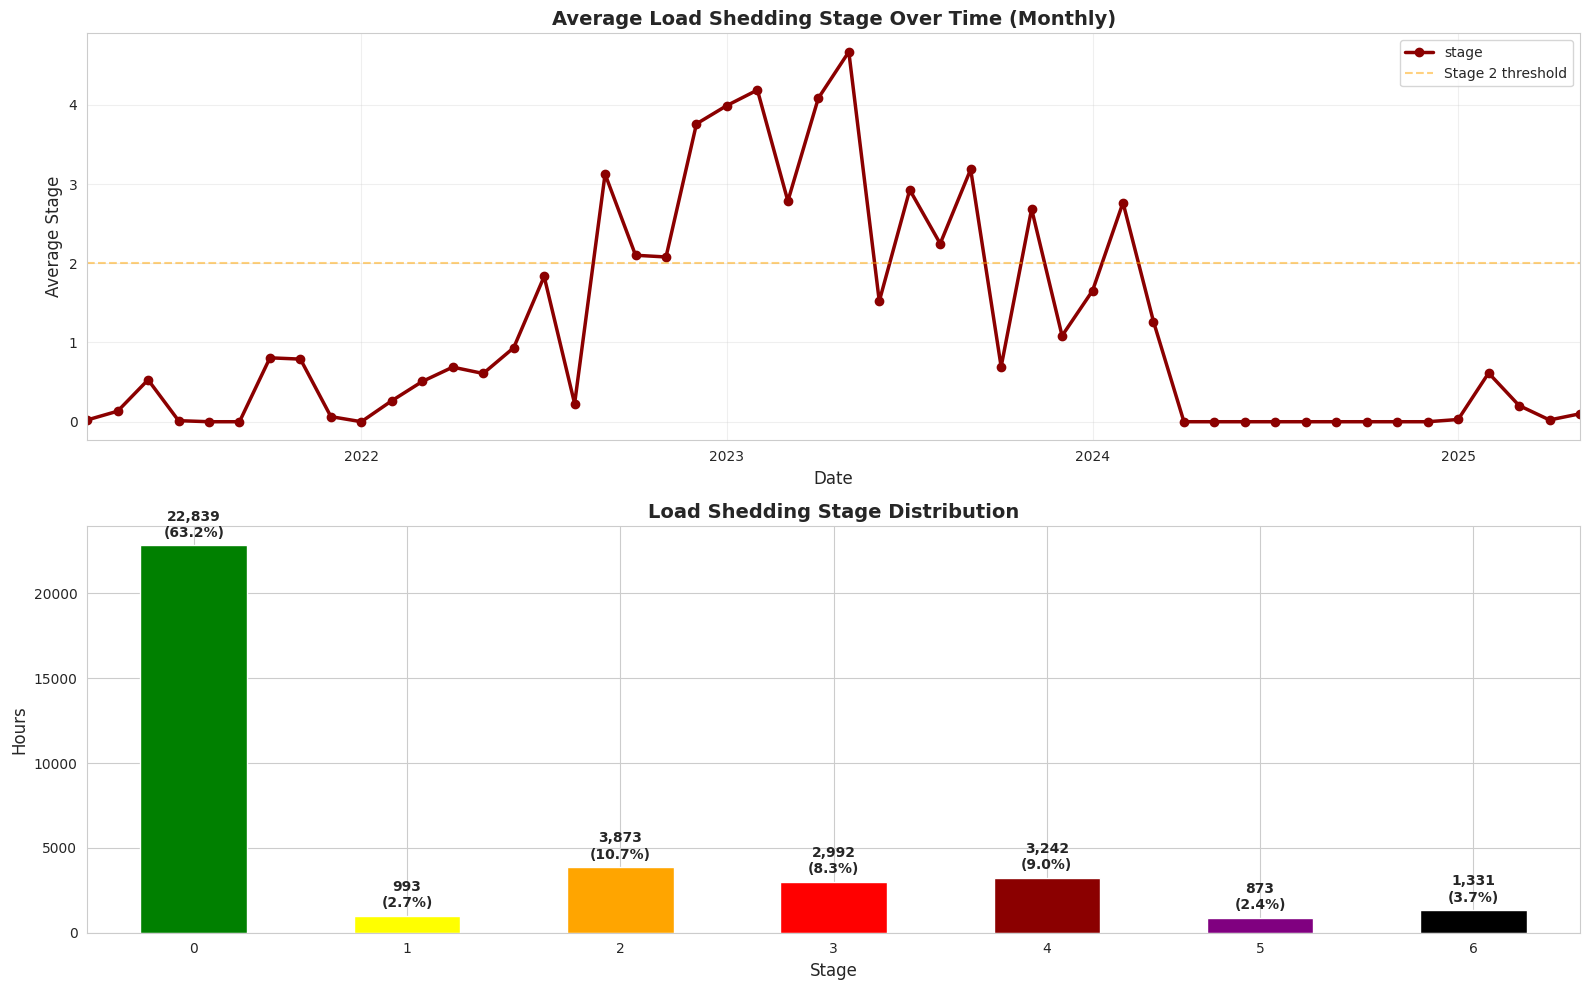

✅ Visualization 1 saved

📊 Creating Visualization 2: Grid Stress Indicators...


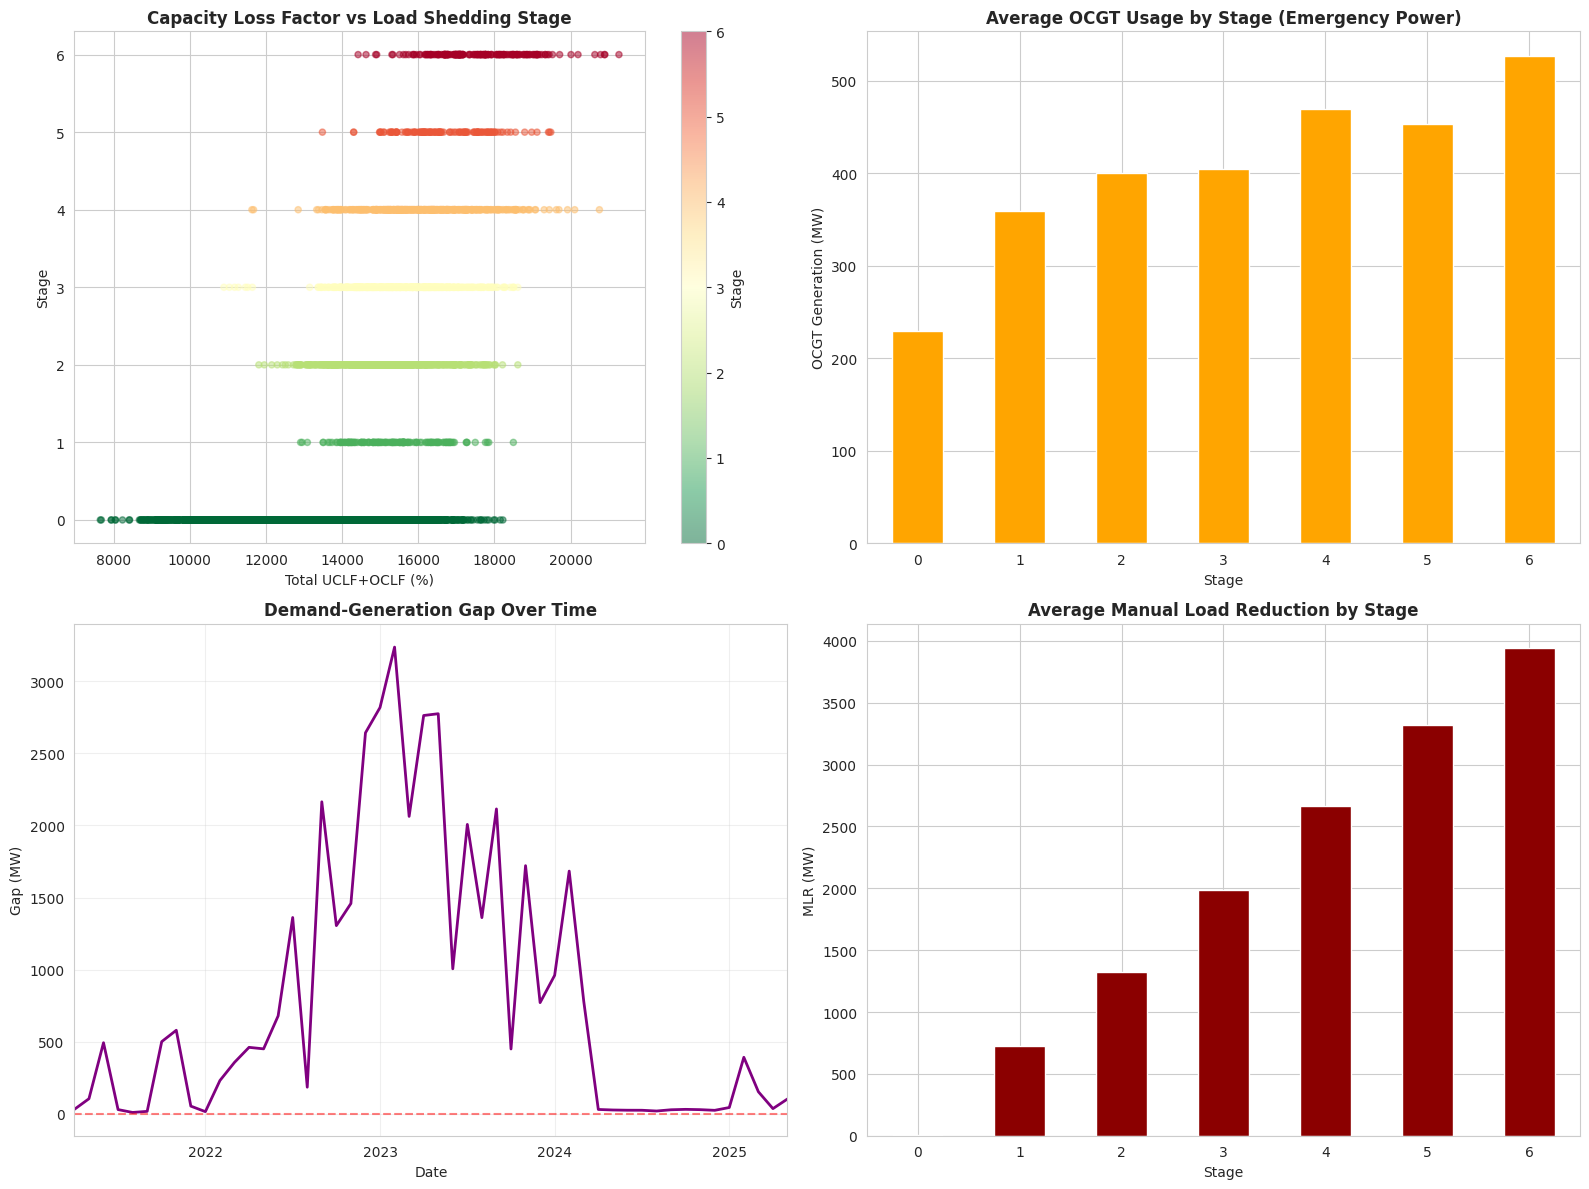

✅ Visualization 2 saved

📊 Creating Visualization 3: Correlation Heatmap...


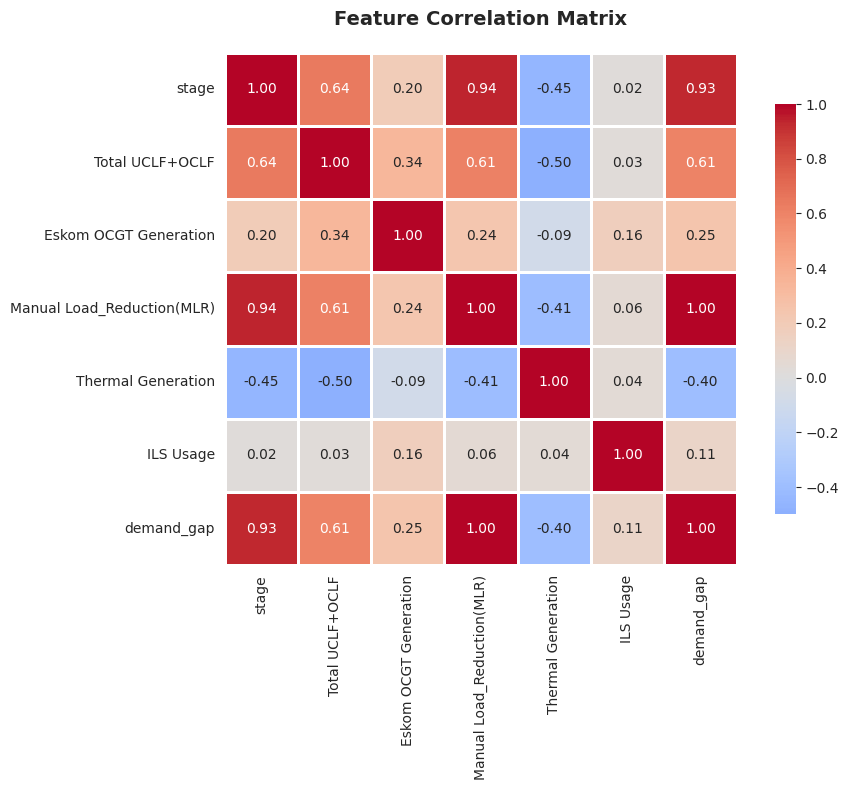


📊 Correlation with Load Shedding Stage:
Manual Load_Reduction(MLR)    0.937111
demand_gap                    0.931572
Total UCLF+OCLF               0.638259
Total UCLF                    0.614917
Eskom OCGT Generation         0.196470
Residual Demand               0.134436
RSA Contracted Demand         0.115166
Name: stage, dtype: float64

✅ Visualization 3 saved

📊 Creating Visualization 4: Temporal Patterns...


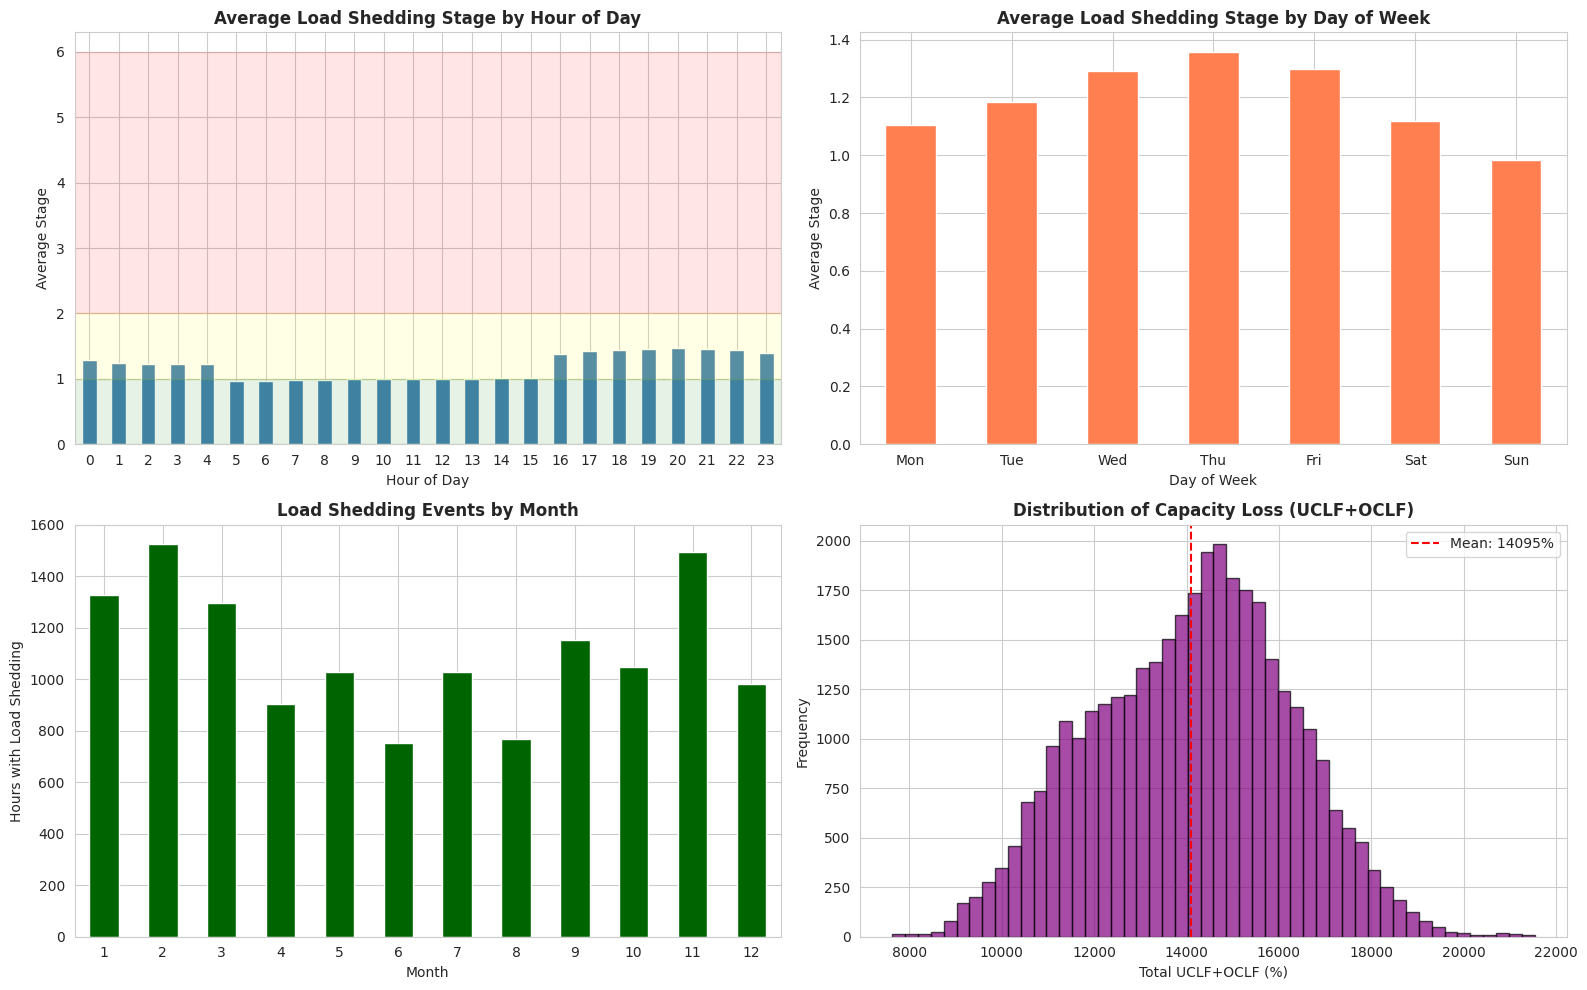

✅ Visualization 4 saved

VISUALIZATION SUMMARY

✅ 4 visualizations created and saved to:
   /content/drive/MyDrive/LoadShedding_Capstone/outputs/01_loadshedding_trends.png
   /content/drive/MyDrive/LoadShedding_Capstone/outputs/02_grid_stress_indicators.png
   /content/drive/MyDrive/LoadShedding_Capstone/outputs/03_correlation_heatmap.png
   /content/drive/MyDrive/LoadShedding_Capstone/outputs/04_temporal_patterns.png

These visualizations are ready for your capstone report!


In [ ]:

print("\n" + "="*70)
print("[9/10] Generating visualizations...")
print("="*70)

# Create derived feature for visualization
merged_df['demand_gap'] = merged_df['Residual Demand'] - merged_df['Dispatchable Generation']

# ==================
# VISUALIZATION 1: Load Shedding Trends Over Time
# ==================
print("\n📊 Creating Visualization 1: Load Shedding Trends...")

fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Plot 1: Average Stage Over Time (Monthly)
stage_monthly = merged_df.groupby(merged_df['datetime'].dt.to_period('M'))['stage'].mean()
stage_monthly.plot(ax=axes[0], color='darkred', linewidth=2.5, marker='o')
axes[0].set_title('Average Load Shedding Stage Over Time (Monthly)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Date', fontsize=12)
axes[0].set_ylabel('Average Stage', fontsize=12)
axes[0].grid(True, alpha=0.3)
axes[0].axhline(y=2, color='orange', linestyle='--', alpha=0.5, label='Stage 2 threshold')
axes[0].legend()

# Plot 2: Stage Distribution
stage_counts = merged_df['stage'].value_counts().sort_index()
colors = ['green', 'yellow', 'orange', 'red', 'darkred', 'purple', 'black']
stage_counts.plot(kind='bar', ax=axes[1], color=colors[:len(stage_counts)])
axes[1].set_title('Load Shedding Stage Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Stage', fontsize=12)
axes[1].set_ylabel('Hours', fontsize=12)
axes[1].tick_params(axis='x', rotation=0)

# Add percentage labels
for i, (stage, count) in enumerate(stage_counts.items()):
    pct = count / len(merged_df) * 100
    axes[1].text(i, count + 500, f'{count:,}\n({pct:.1f}%)',
                 ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig(f'{output_viz_dir}/01_loadshedding_trends.png', dpi=150, bbox_inches='tight')
plt.show()

print("✅ Visualization 1 saved")


# ==================
# VISUALIZATION 2: Grid Stress Indicators
# ==================
print("\n📊 Creating Visualization 2: Grid Stress Indicators...")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Capacity Loss vs Load Shedding Stage
sample_data = merged_df.sample(n=min(5000, len(merged_df)), random_state=42)
scatter = axes[0, 0].scatter(sample_data['Total UCLF+OCLF'], sample_data['stage'],
                             c=sample_data['stage'], cmap='RdYlGn_r', alpha=0.5, s=20)
axes[0, 0].set_title('Capacity Loss Factor vs Load Shedding Stage', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Total UCLF+OCLF (%)')
axes[0, 0].set_ylabel('Stage')
plt.colorbar(scatter, ax=axes[0, 0], label='Stage')

# Plot 2: OCGT Usage by Stage (Emergency Power)
ocgt_by_stage = merged_df.groupby('stage')['Eskom OCGT Generation'].mean()
ocgt_by_stage.plot(kind='bar', ax=axes[0, 1], color='orange')
axes[0, 1].set_title('Average OCGT Usage by Stage (Emergency Power)', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Stage')
axes[0, 1].set_ylabel('OCGT Generation (MW)')
axes[0, 1].tick_params(axis='x', rotation=0)

# Plot 3: Demand-Generation Gap Over Time
gap_monthly = merged_df.groupby(merged_df['datetime'].dt.to_period('M'))['demand_gap'].mean()
gap_monthly.plot(ax=axes[1, 0], color='purple', linewidth=2)
axes[1, 0].axhline(y=0, color='red', linestyle='--', alpha=0.5)
axes[1, 0].set_title('Demand-Generation Gap Over Time', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Gap (MW)')
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Manual Load Reduction by Stage
mlr_by_stage = merged_df.groupby('stage')['Manual Load_Reduction(MLR)'].mean()
mlr_by_stage.plot(kind='bar', ax=axes[1, 1], color='darkred')
axes[1, 1].set_title('Average Manual Load Reduction by Stage', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Stage')
axes[1, 1].set_ylabel('MLR (MW)')
axes[1, 1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.savefig(f'{output_viz_dir}/02_grid_stress_indicators.png', dpi=150, bbox_inches='tight')
plt.show()

print("✅ Visualization 2 saved")


# ==================
# VISUALIZATION 3: Feature Correlation Heatmap
# ==================
print("\n📊 Creating Visualization 3: Correlation Heatmap...")

# Select key features for correlation
corr_features = [
    'stage',
    'Total UCLF+OCLF',
    'Eskom OCGT Generation',
    'Manual Load_Reduction(MLR)',
    'Thermal Generation',
    'ILS Usage',
    'demand_gap'
]

# Calculate correlation
corr_matrix = merged_df[corr_features].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig(f'{output_viz_dir}/03_correlation_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n📊 Correlation with Load Shedding Stage:")
print("="*50)
correlations = merged_df.corr()['stage'].sort_values(ascending=False)
print(correlations[1:8])  # Top 7 features

print("\n✅ Visualization 3 saved")


# ==================
# VISUALIZATION 4: Hourly and Daily Patterns
# ==================
print("\n📊 Creating Visualization 4: Temporal Patterns...")

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Plot 1: Average Stage by Hour of Day
merged_df['hour'] = merged_df['datetime'].dt.hour
hourly_stage = merged_df.groupby('hour')['stage'].mean()
hourly_stage.plot(kind='bar', ax=axes[0, 0], color='steelblue')
axes[0, 0].set_title('Average Load Shedding Stage by Hour of Day', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Hour of Day')
axes[0, 0].set_ylabel('Average Stage')
axes[0, 0].tick_params(axis='x', rotation=0)
axes[0, 0].axhspan(0, 1, alpha=0.1, color='green', label='Low')
axes[0, 0].axhspan(1, 2, alpha=0.1, color='yellow')
axes[0, 0].axhspan(2, 6, alpha=0.1, color='red')

# Plot 2: Average Stage by Day of Week
merged_df['day_of_week'] = merged_df['datetime'].dt.dayofweek
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
daily_stage = merged_df.groupby('day_of_week')['stage'].mean()
daily_stage.plot(kind='bar', ax=axes[0, 1], color='coral')
axes[0, 1].set_title('Average Load Shedding Stage by Day of Week', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Day of Week')
axes[0, 1].set_ylabel('Average Stage')
axes[0, 1].set_xticklabels(day_names, rotation=0)

# Plot 3: Load Shedding Frequency by Month
merged_df['month'] = merged_df['datetime'].dt.month
monthly_ls_freq = merged_df[merged_df['stage'] > 0].groupby('month').size()
monthly_ls_freq.plot(kind='bar', ax=axes[1, 0], color='darkgreen')
axes[1, 0].set_title('Load Shedding Events by Month', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Hours with Load Shedding')
axes[1, 0].tick_params(axis='x', rotation=0)

# Plot 4: Capacity Loss Distribution
axes[1, 1].hist(merged_df['Total UCLF+OCLF'], bins=50, color='purple', alpha=0.7, edgecolor='black')
axes[1, 1].set_title('Distribution of Capacity Loss (UCLF+OCLF)', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Total UCLF+OCLF (%)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].axvline(merged_df['Total UCLF+OCLF'].mean(), color='red', linestyle='--',
                   label=f'Mean: {merged_df["Total UCLF+OCLF"].mean():.0f}%')
axes[1, 1].legend()

plt.tight_layout()
plt.savefig(f'{output_viz_dir}/04_temporal_patterns.png', dpi=150, bbox_inches='tight')
plt.show()

print("✅ Visualization 4 saved")


# Print summary
print("\n" + "="*70)
print("VISUALIZATION SUMMARY")
print("="*70)
print(f"\n✅ 4 visualizations created and saved to:")
print(f"   {output_viz_dir}/01_loadshedding_trends.png")
print(f"   {output_viz_dir}/02_grid_stress_indicators.png")
print(f"   {output_viz_dir}/03_correlation_heatmap.png")
print(f"   {output_viz_dir}/04_temporal_patterns.png")
print(f"\nThese visualizations are ready for your capstone report!")

# SECTION 10: EXPORT CLEANED DATA TO GOOGLE DRIVE


In [ ]:

print("\n" + "="*70)
print("[10/10] Exporting cleaned data to Google Drive...")
print("="*70)

# Export main dataset
output_path = f'{output_data_dir}/cleaned_loadshedding_data.csv'
merged_df.to_csv(output_path, index=False)
print(f"\n✅ Main dataset saved: {output_path}")
print(f"   Size: {len(merged_df):,} rows × {len(merged_df.columns)} columns")
print(f"   File size: {os.path.getsize(output_path) / 1024**2:.2f} MB")

# Create data dictionary
data_dict = {
    'datetime': 'Timestamp (hourly)',
    'Residual Demand': 'Actual electricity demand (MW)',
    'RSA Contracted Demand': 'Forecasted demand (MW)',
    'Dispatchable Generation': 'Total available generation (MW)',
    'Thermal Generation': 'Coal-fired power generation (MW)',
    'Nuclear Generation': 'Nuclear power from Koeberg (MW)',
    'Eskom OCGT Generation': 'Open Cycle Gas Turbine - emergency diesel/gas (MW)',
    'Total RE': 'Total renewable energy generation (MW)',
    'Total UCLF': 'Unplanned Capacity Loss Factor (%)',
    'Total OCLF': 'Other Capacity Loss Factor (%)',
    'Total UCLF+OCLF': 'Combined capacity losses - KEY PREDICTOR (%)',
    'Total PCLF': 'Planned Capacity Loss Factor - maintenance (%)',
    'ILS Usage': 'Interruptible Load Shedding - voluntary reduction (MW)',
    'Manual Load_Reduction(MLR)': 'Emergency manual load reduction (MW)',
    'International Imports': 'External grid support (MW)',
    'stage': 'Load shedding stage (0-6) - TARGET VARIABLE',
    'demand_gap': 'Demand minus Generation (MW) - derived feature'
}

dict_df = pd.DataFrame(list(data_dict.items()), columns=['Feature', 'Description'])
dict_path = f'{output_data_dir}/data_dictionary.csv'
dict_df.to_csv(dict_path, index=False)
print(f"\n✅ Data dictionary saved: {dict_path}")

# Save sample preview
sample_path = f'{output_data_dir}/data_sample_preview.csv'
merged_df.head(100).to_csv(sample_path, index=False)
print(f"✅ Sample preview saved: {sample_path}")

# Save feature list
features_path = f'{output_data_dir}/feature_list.txt'
with open(features_path, 'w') as f:
    f.write("FEATURES IN CLEANED DATASET\n")
    f.write("="*50 + "\n\n")
    for i, col in enumerate(merged_df.columns, 1):
        f.write(f"{i:2d}. {col}\n")
print(f"✅ Feature list saved: {features_path}")

# Train/Test split recommendation
print("\n" + "="*70)
print("TRAIN/TEST SPLIT RECOMMENDATION")
print("="*70)

total_rows = len(merged_df)
train_size = int(total_rows * 0.80)
test_size = total_rows - train_size

train_end = merged_df.iloc[train_size]['datetime']
test_start = merged_df.iloc[train_size + 1]['datetime']

print(f"\nRecommended 80/20 split:")
print(f"\n  Training Set: {train_size:,} rows (80.0%)")
print(f"    Date range: {merged_df['datetime'].min()} to {train_end}")
print(f"\n  Test Set: {test_size:,} rows (20.0%)")
print(f"    Date range: {test_start} to {merged_df['datetime'].max()}")

print(f"\n  Code for next notebook:")
print(f"    train_df = df.iloc[:{train_size}]")
print(f"    test_df = df.iloc[{train_size}:]")

# Final summary
print("\n" + "="*70)
print("✅ DATA CLEANING COMPLETED SUCCESSFULLY!")
print("="*70)

print(f"\n📁 All files saved to Google Drive:")
print(f"\n   Data Files:")
print(f"   ├── {output_data_dir}/cleaned_loadshedding_data.csv")
print(f"   ├── {output_data_dir}/data_dictionary.csv")
print(f"   ├── {output_data_dir}/data_sample_preview.csv")
print(f"   └── {output_data_dir}/feature_list.txt")

print(f"\n   Visualization Files:")
print(f"   ├── {output_viz_dir}/01_loadshedding_trends.png")
print(f"   ├── {output_viz_dir}/02_grid_stress_indicators.png")
print(f"   ├── {output_viz_dir}/03_correlation_heatmap.png")
print(f"   └── {output_viz_dir}/04_temporal_patterns.png")

print(f"\n📊 Dataset Summary:")
print(f"   • {len(merged_df):,} hourly records")
print(f"   • {len(merged_df.columns)} features")
print(f"   • {(merged_df['datetime'].max() - merged_df['datetime'].min()).days} days of data")
print(f"   • {len(merged_df[merged_df['stage'] > 0]):,} hours with load shedding")
print(f"   • Ready for ML training!")

print(f"\n🚀 Next Steps:")
print(f"   1. Week 5: Feature Engineering (lag features, rolling averages)")
print(f"   2. Week 6: Train LSTM + Prophet models")
print(f"   3. Week 7: Model evaluation and testing")

print("\n" + "="*70)
print("🎉 WEEK 4 COMPLETE - DATA PREPARATION DONE!")
print("="*70)


[10/10] Exporting cleaned data to Google Drive...

✅ Main dataset saved: /content/drive/MyDrive/LoadShedding_Capstone/data/cleaned_loadshedding_data.csv
   Size: 36,143 rows × 20 columns
   File size: 5.11 MB

✅ Data dictionary saved: /content/drive/MyDrive/LoadShedding_Capstone/data/data_dictionary.csv
✅ Sample preview saved: /content/drive/MyDrive/LoadShedding_Capstone/data/data_sample_preview.csv
✅ Feature list saved: /content/drive/MyDrive/LoadShedding_Capstone/data/feature_list.txt

TRAIN/TEST SPLIT RECOMMENDATION

Recommended 80/20 split:

  Training Set: 28,914 rows (80.0%)
    Date range: 2021-04-01 00:00:00 to 2024-07-18 18:00:00

  Test Set: 7,229 rows (20.0%)
    Date range: 2024-07-18 19:00:00 to 2025-05-15 22:00:00

  Code for next notebook:
    train_df = df.iloc[:28914]
    test_df = df.iloc[28914:]

✅ DATA CLEANING COMPLETED SUCCESSFULLY!

📁 All files saved to Google Drive:

   Data Files:
   ├── /content/drive/MyDrive/LoadShedding_Capstone/data/cleaned_loadshedding_da

---


### Key Findings:

- **63.2%** of hours had no load shedding (Stage 0)
- **36.8%** of hours experienced load shedding (Stage 1-6)
- **Strongest predictors**: Manual Load Reduction (0.94), Demand Gap (0.93), Capacity Loss (0.64)
- **2023 was the worst year** with average Stage 3-4 load shedding
- **Dataset is ready** for hybrid LSTM-Prophet model training

---

**Author:** Bonyu Miracle Glen  
**Project:** Load Shedding Prediction System  
**Institution:** African Leadership University  

---